# Telecom Project - Churn Rate

## 1) Introduction

In this project, we will work on a dataset from a Telecom company that offers the following services: telephone lines, internet, streaming, online safety & backup, technical suport, among others. This study's goal is to analyze the firm's churn rate, which is the percentage of clients that cancell or do not renew their contracts in comparison to the total number of customers. So, we will focus our efforts to identify what are the main problems that could be increasing the firm's churn rate, in order to retain more clients. Finally, it is relevant to state that it is usually less costly for a company to maintain its current customers than attracting new ones, which highlights the importance of identifying the source of cancellations through data analysis.

How are we going to achieve this?

- Using Python to clean the dataset and to organize it.

- Employ Plotly library to visualize the information and to conduct an exploratory analysis.


Questions:

- 1) What is the firm's churn rate?

- 2) What are the possible causes for this churn rate? How can we reduce it?

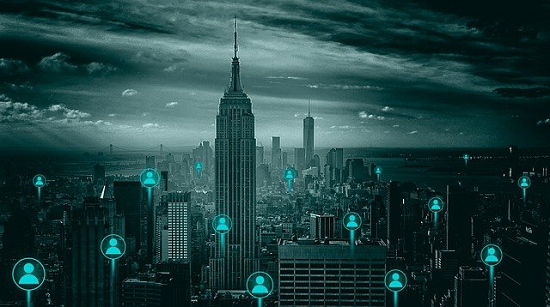

### 1.2) Data Source

This dataset is from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

## 2) Analysis

### 2.1) Importing the libraries

In [34]:
import pandas as pd
import plotly.express as px

### 2.2) Importing the dataset

In [35]:
all_data=pd.read_csv('Telecom Company dataset.csv')

display(all_data)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

The dataset has 7043 rows and 21 columns.

In [36]:
display(all_data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Let's describe the data:

In [37]:
display(all_data[['tenure','MonthlyCharges']].describe())

tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

The average tenure is around 32,4 months and the average monthly charge is aprox. 64,8 dollars. The medians are the following: 29 months for tenure and 70,35 dollars for Monthly Charges. The difference between the mean and the median for each variable is not extreme, so this indicates that we probably don't have too many discrepant outliers in these columns.

### 2.3) Data cleaning

In [38]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We won't need the column named 'customerID' to conduct our analysis, so let's drop it:

In [39]:
all_data.drop('customerID', axis=1, inplace=True)

all_data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

The column TotalCharges's dtype is incorrect. We need to convert it to float:

In [40]:
all_data['TotalCharges']=pd.to_numeric(all_data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

As it returned a Value Error. Let's underestand what happened:

In [42]:
all_data[all_data['TotalCharges']!=" "]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7032 rows x 20 columns]

In [43]:
all_data[all_data['TotalCharges']==" "]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

The quotation marks " " are just empty spaces that refer to customers that never paid anything to the company, because their contracts did not complete 1 month yet. We can notice this by analyzing their tenure, which is zero for all the 11 rows above. I am going to replace these quotation marks with zeros in the 'Total Charges' column, so we can continue with our analysis. As we are not going to apply aggregate functions on the numerical columns, these zeros won't be a problem. For instance, If we had to analyze the average 'Total Charge' paid by customers, these zeros could bias our results, because the calculation would take into consideration some customers that did not pay anything yet.  However, our focus here is to analyze the company's churn rate, so it is relevant to include clients that have contracts that did not complete one month yet. This allowed us to identify that in this group of 11 clients, nobody canceled before paying their first monthly fee.

Finally, it is important to state that these 11 rows only represent 0,156% of our dataset. 

In [44]:
all_data['TotalCharges'] = all_data['TotalCharges'].replace(" ", 0).astype('float64')

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Now, all of our columns have 7043 non-null values. Let's proceed with our study:

### 3) Questions

### Question 1) What is the firm's churn rate?

In [45]:
all_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

1869 customers cancelled their plans or did not renew their contracts. Let's calculate the relative frequencies:

In [46]:
all_data['Churn'].value_counts(normalize=True).map('{:.2%}'.format)

No     73.46%
Yes    26.54%
Name: Churn, dtype: object

Therefore, the company's churn rate is around 26,54%. I will create a chart so we can visualize this data:

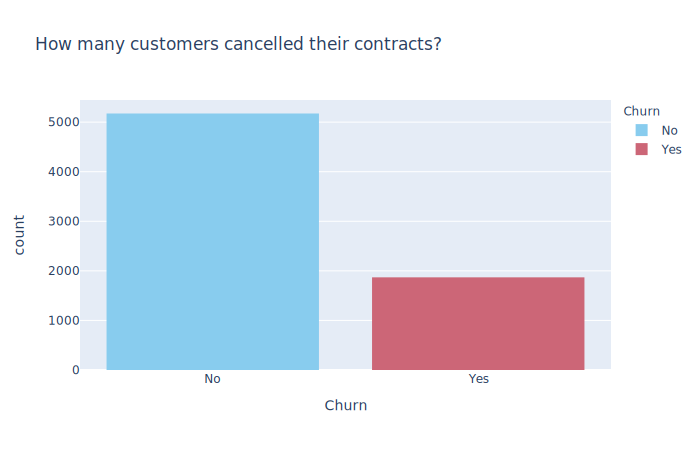

In [81]:
# https://plotly.com/python/styling-plotly-express/

# https://plotly.com/python/discrete-color/

#https://plotly.com/python/figure-labels/

churn_vis=px.histogram(all_data, x='Churn', color='Churn',title="How many customers cancelled their contracts?",
                color_discrete_sequence=px.colors.qualitative.Safe)

churn_vis.show('svg')

### Answer Q1:

The firm's churn rate is 26,54%. 1869 customers cancelled their contracts and 5174 did not cancell.

### Question 2) What are the possible causes for this churn rate? How can we reduce it?

To answer this question, we have to create charts for all the columns in the dataframe. We will analyze the results after the graphs:

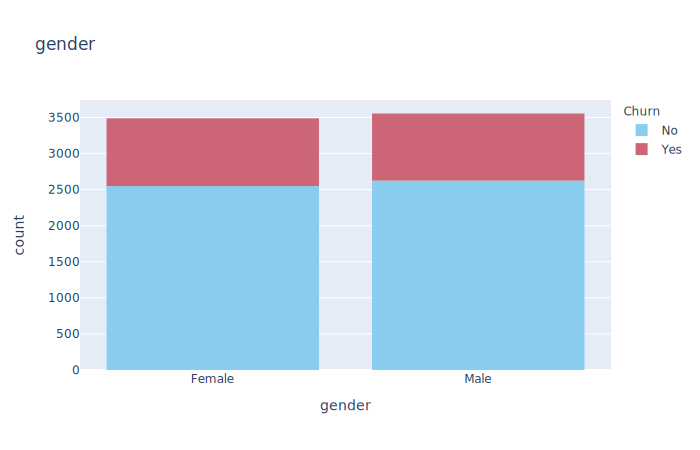

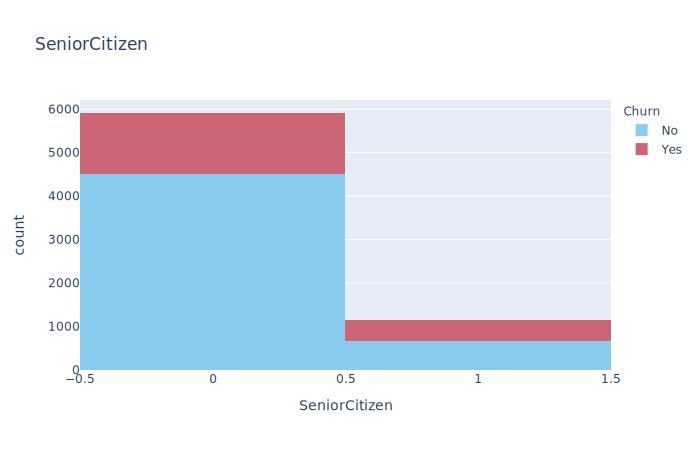

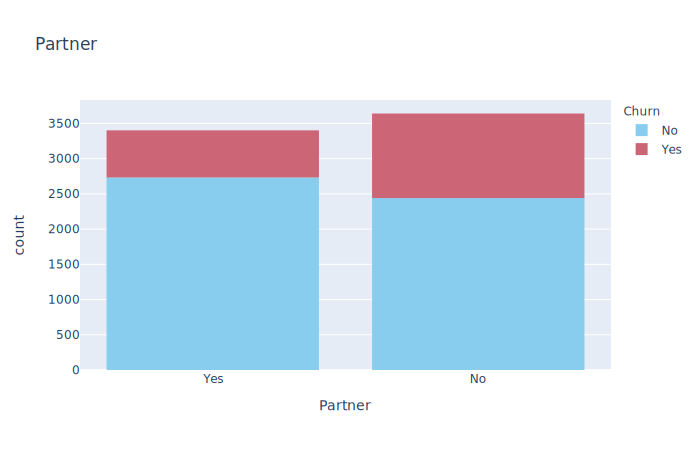

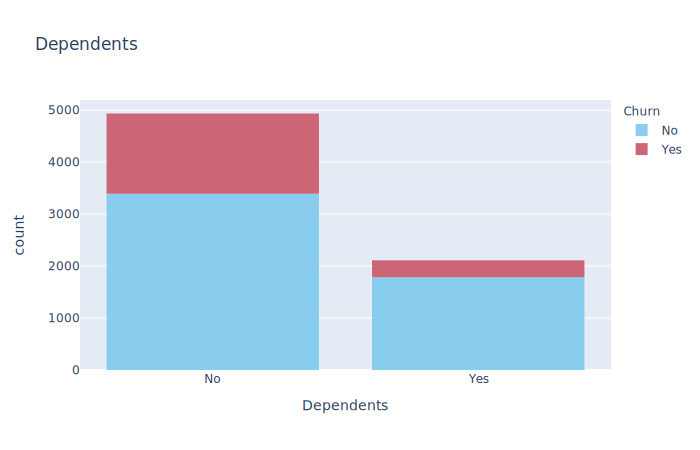

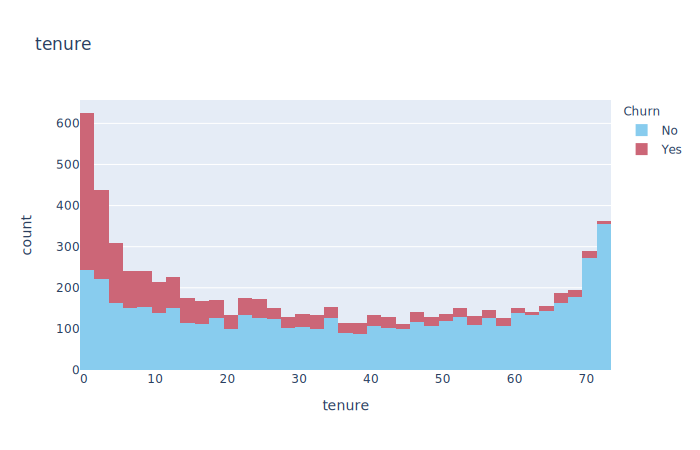

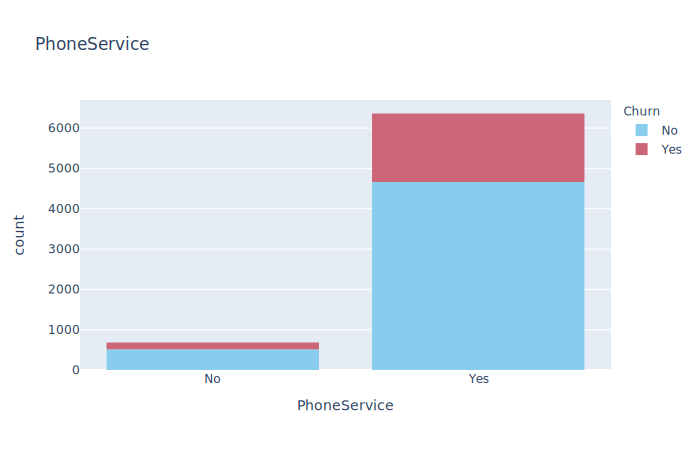

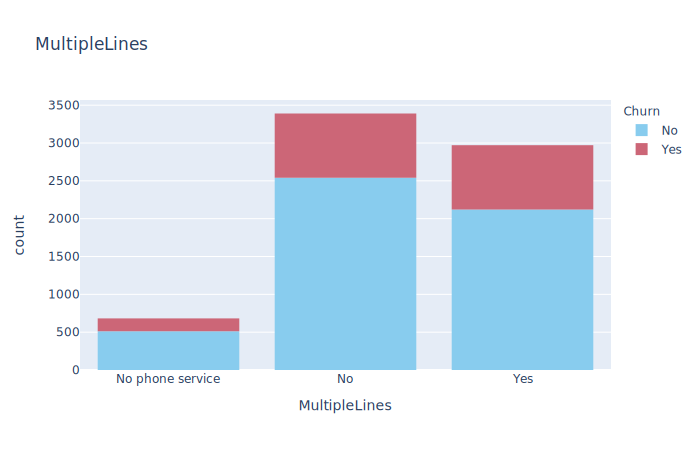

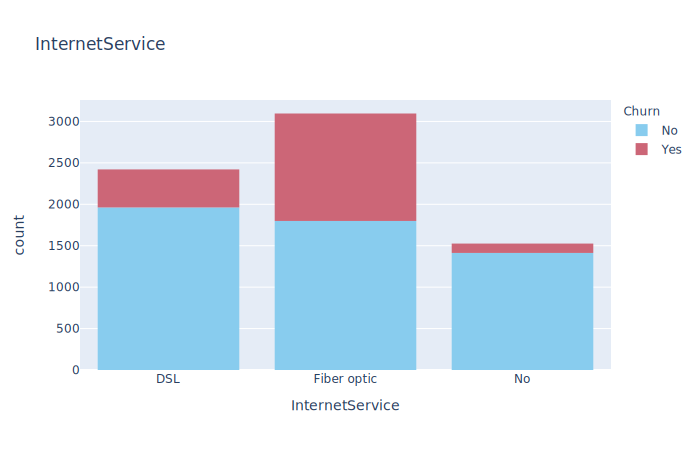

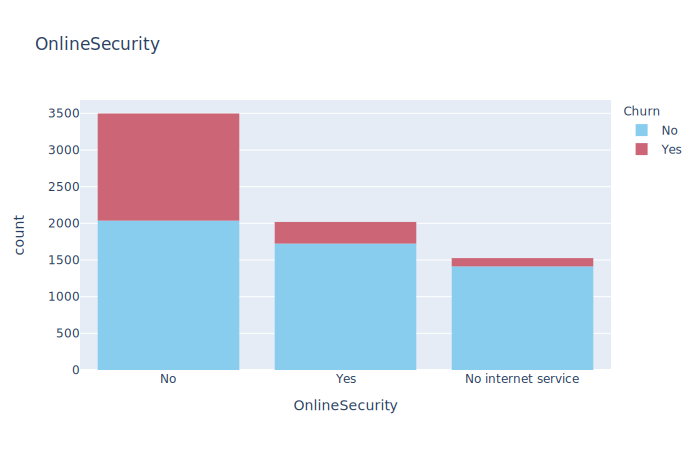

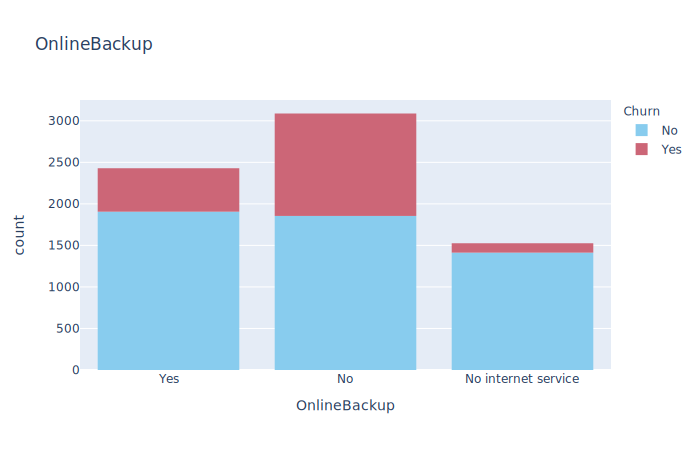

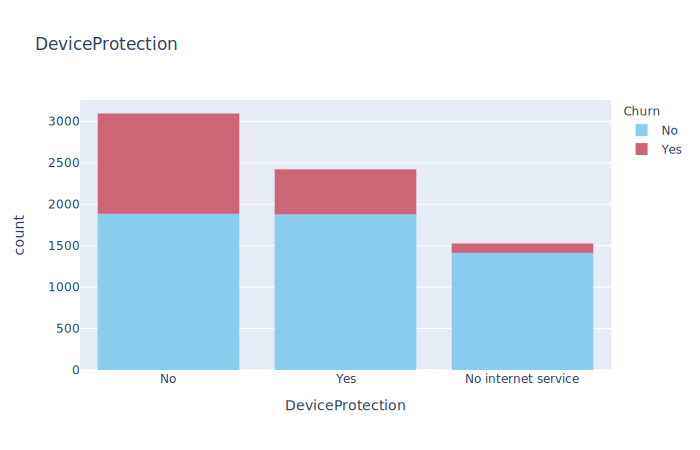

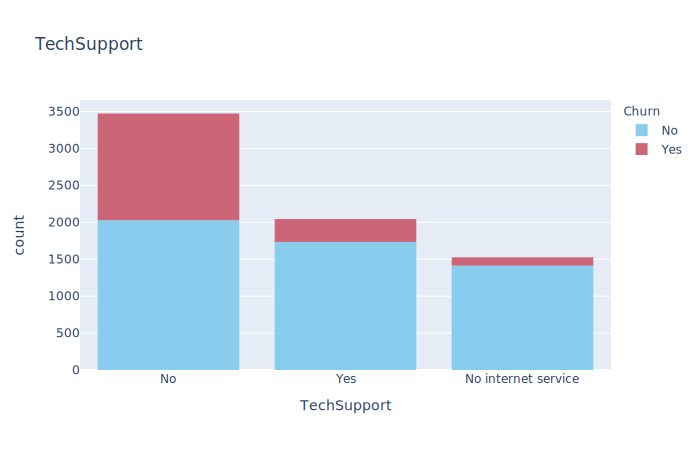

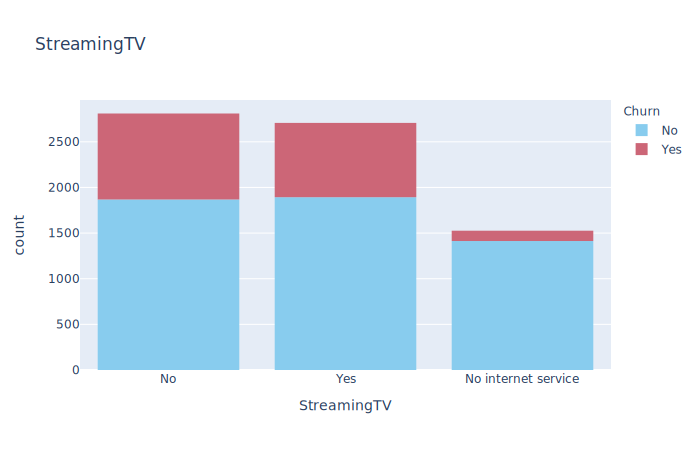

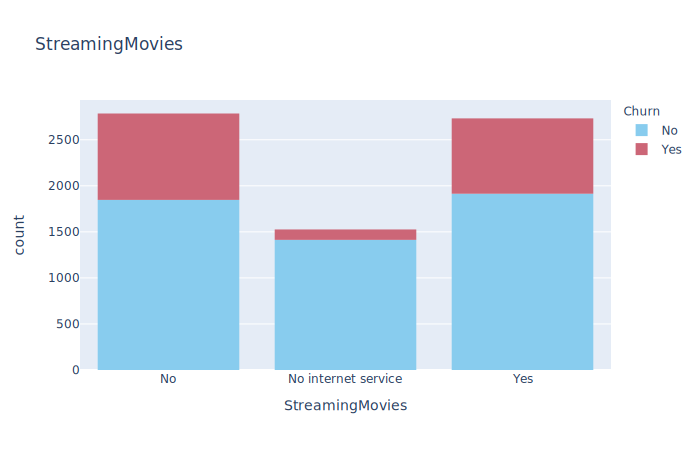

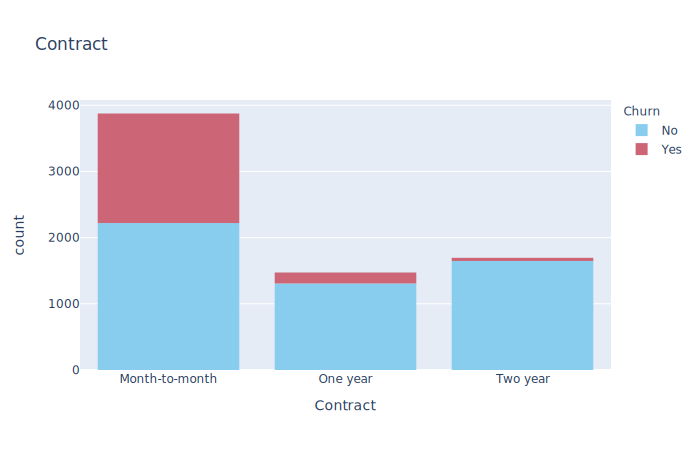

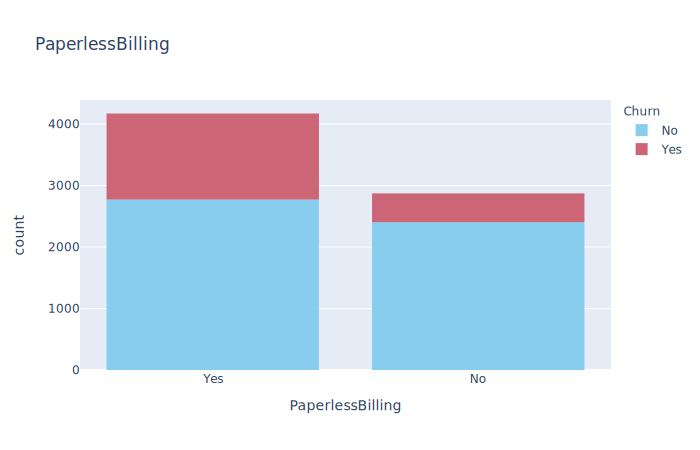

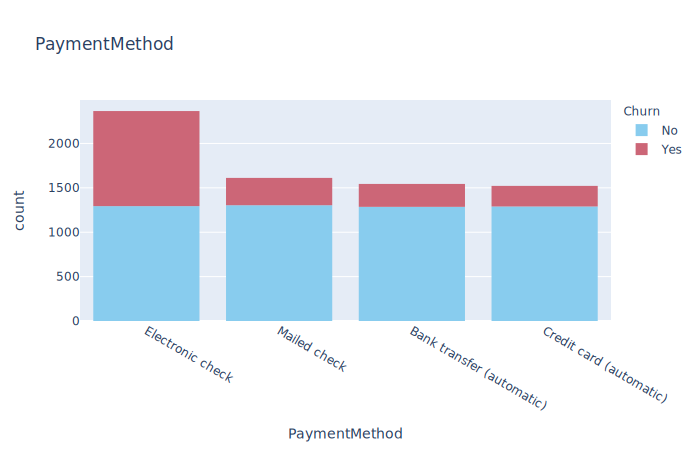

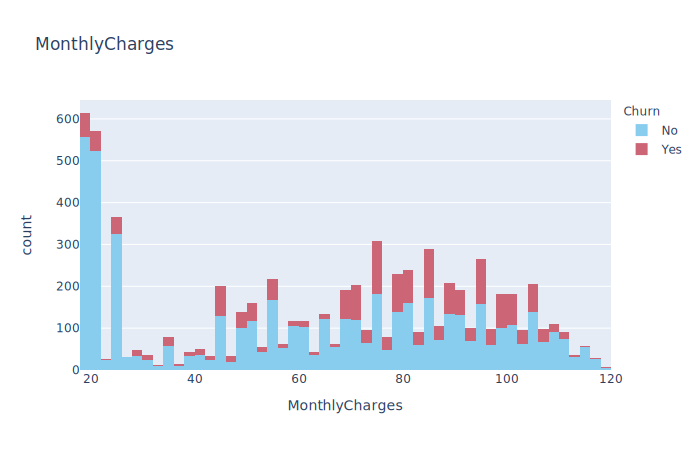

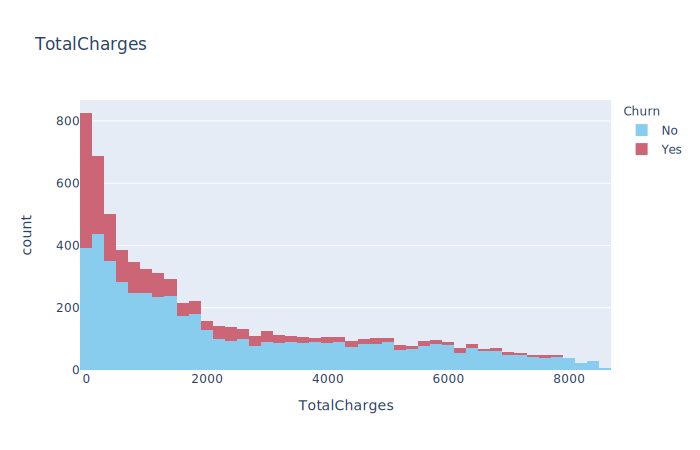

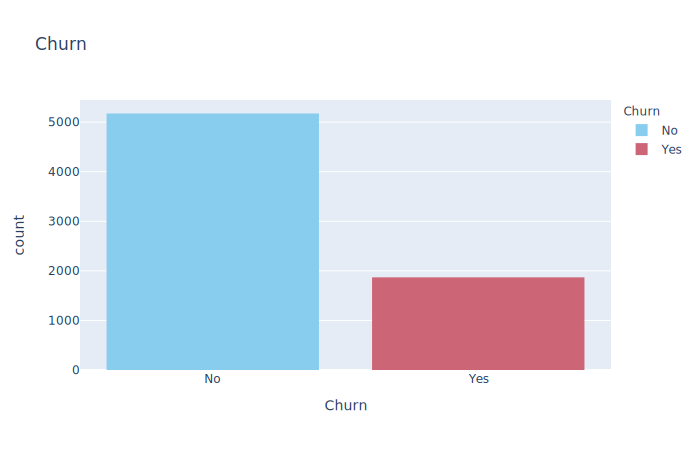

In [82]:
# How to activate toggle scrolling in Jupyer: https://stackoverflow.com/questions/18770504/resize-ipython-notebook-output-window

for column in all_data:
    
    chart=px.histogram(all_data, x=column, color='Churn', title=column, 
                color_discrete_sequence=px.colors.qualitative.Safe)
    
    chart.show('svg')

### Answer Q2:

To answer this question, it is important to state that we are going to analyze the most relevant problems that could be increasing the firm's churn rate. This mindset is necessary because every company has limited resources (personnel, financial, among others), so we must target the most pertinent issues, that is, the ones that can generate a considerable decrease in the firm's churn rate.

### 1) Tenure: 

I identified an interesing insight with respect to the period that each person remains as a client:

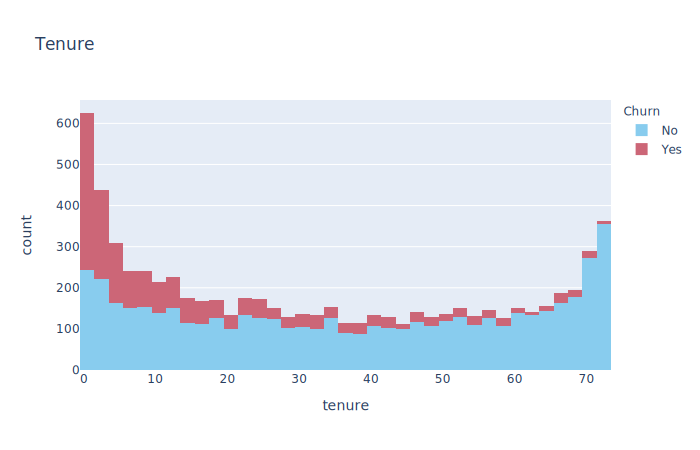

In [79]:
tenure_chart=px.histogram(all_data, x='tenure', color='Churn', title='Tenure',
                         color_discrete_sequence=px.colors.qualitative.Safe)

tenure_chart.show('svg')

#### Problem: 

- Too many cancellations in the first months of the contract.

#### Interpretation: 

- In the first two months after signing the contract, there is a higher probability that the client will cancel (60,9%) the services than continue (39,1%) with the company. In addition, in the first 12 months, 999 people cancelled their contracts, which represents 53,45% of the total number of customers that decided not to use the company's services anymore (1869 people). In this regard, it is possible to notice that as time goes by, the likelihood that each person will continue as a client increases. 

#### Solution: 

- We can offer discounts to motivate customers to sign contracts with loyalty periods. For instance, if the client agrees to stay with the company for at least one year, he/she will get a 20% discount. This can substantially reduce the firm's churn rate, considering that after 12 months, there is a 66,37% chance that each customer will continue to be a client, if we consider the values between the 13th and 14th months.

### 2) Contracts: 

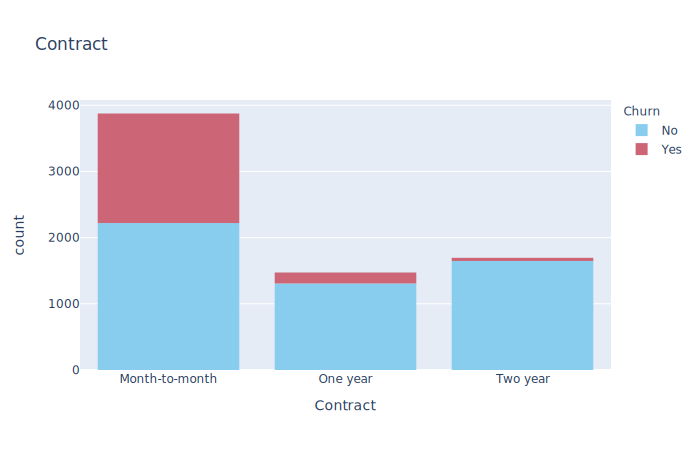

In [78]:
contract_chart=px.histogram(all_data, x='Contract', color='Churn', title='Contract',
                         color_discrete_sequence=px.colors.qualitative.Safe)

contract_chart.show('svg')

#### Problem: 

- Clients that sign month-to-month contracts tend to cancel more. To be more specific, 42,71% of customers with this type of contract decided to cancel.


#### Interpretation: 

- Month-to-month contracts are more permissive in terms of cancellation. So, we have to focus our efforts to motivate customers to sign contracts for longer periods. Usually, one-year and two-year contracts impose penalties for cancellations, so clients do not usually cancel them.



#### Solution: 

- Offer a special deal for clients that want to sign contracts for longer periods. For example, if the customer decides to sign a one-year contract, we will grant him/her a 15% discount. For two year contracts, we can concede a 20% discount and the streaming tv service as as bonus. Please, notice that these discounts are just examples. We need to confirm the possible discounts with the finance and marketing departments.

### 3) Fiber-Optic Internet: 

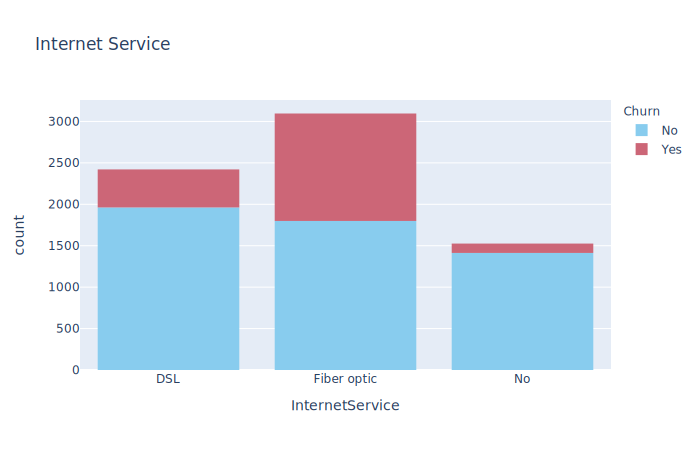

In [77]:
internet_service_chart=px.histogram(all_data, x='InternetService', color='Churn', title='Internet Service',
                         color_discrete_sequence=px.colors.qualitative.Safe)

internet_service_chart.show('svg')

#### Problem: 

- There may be an issue with the company's fiber-optic internet service. Too many customers that pay for this service are cancelling their contracts.

#### Interpretation: 

- Apparently, the firm's fiber-optic internet service is not meeting the customer's expectations. Notice that 41,90% of the clients that have this service cancelled their contracts. Maybe the internet's speed and stability are presenting a poor performance. Therefore, the clients may be looking for the services provided by competitors. 

#### Solution: 

- Ask the technical department to monitor the fiber-optic internet's quality, especially with respect to speed and stability. In addition, we could request a report from this department, including a description of the problems that occurred in this period and possible solutions.

### 4) Additional Services: 

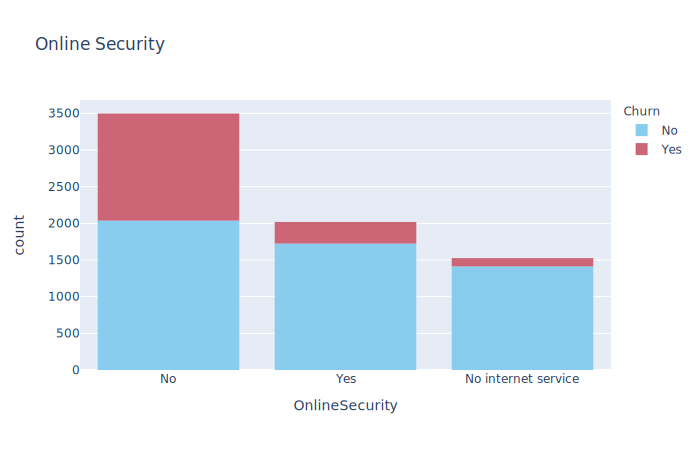

In [83]:
online_security_chart=px.histogram(all_data, x='OnlineSecurity', color='Churn', title='Online Security',
                         color_discrete_sequence=px.colors.qualitative.Safe)

online_security_chart.show('svg')

Notice that clients that don't have an online security service tend to cancel more.

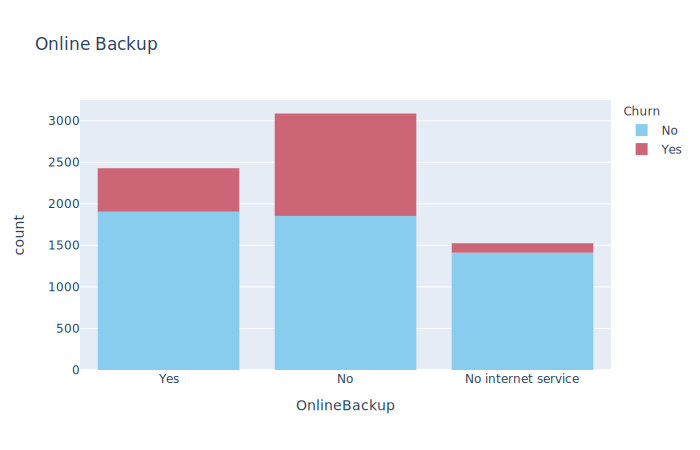

In [84]:
online_backup_chart=px.histogram(all_data, x='OnlineBackup', color='Churn', title='Online Backup',
                         color_discrete_sequence=px.colors.qualitative.Safe)

online_backup_chart.show('svg')

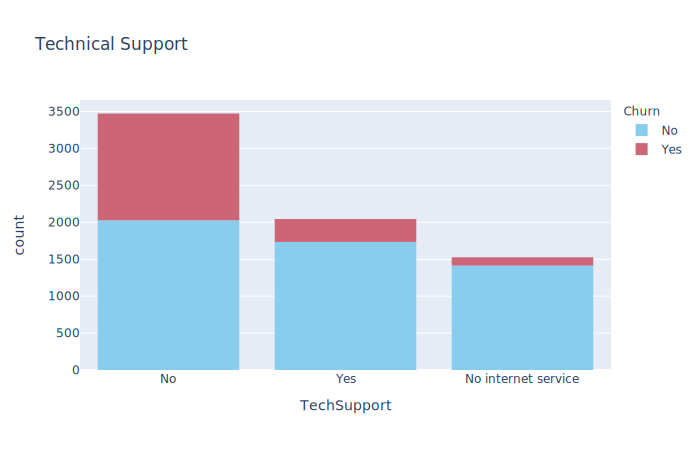

In [85]:
tech_support_chart=px.histogram(all_data, x='TechSupport', color='Churn', title='Technical Support',
                         color_discrete_sequence=px.colors.qualitative.Safe)

tech_support_chart.show('svg')

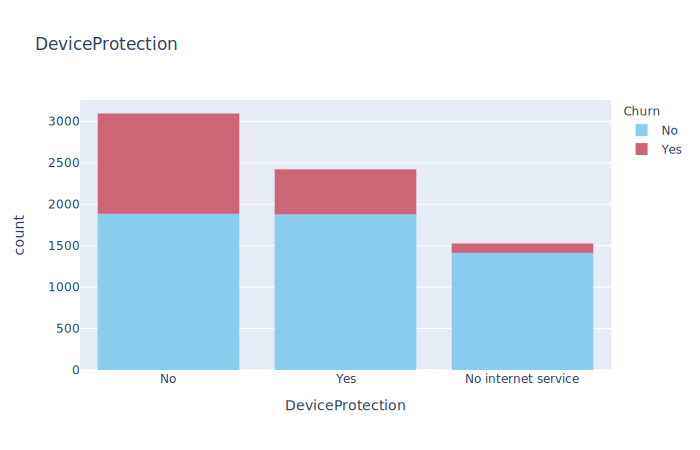

In [86]:
device_protection_chart=px.histogram(all_data, x='DeviceProtection', color='Churn', title='DeviceProtection',
                         color_discrete_sequence=px.colors.qualitative.Safe)



device_protection_chart.show('svg')

The same thing happens with Online Backup, Technical Support and Device Protection services.

#### Problem: 

- Customers that don't have additional services tend to cancel more.

#### Interpretation: 

- Clients that have additional services have a lower probability of cancelling their contracts. This happens for two main reasons. Firstly, these services increase the quality of the company's service considerably, so the customers may perceive a higher aggregated value offered by the firm. Secondly, when clients have many services attached to one contract, the opportunity cost of changing their provider may not be worth it. This is due to the fact that they are already used to the advantages offered by these additional services and it may be costly (stress, time loss, money, among others) for them to lose them.

#### Solution: 

- We can offer special prices for the additional services mentioned above (Online Security, Online Backup, Technical Support and Device Protection). For instance, if the customers pay 5 dollars more, they will receive online security and backup services as a bonus. If they pay 10 dollars more, they will get all 4 additional services. This is beneficial to the company, because it will retain customers in the long term.

### 5) Payment Method:

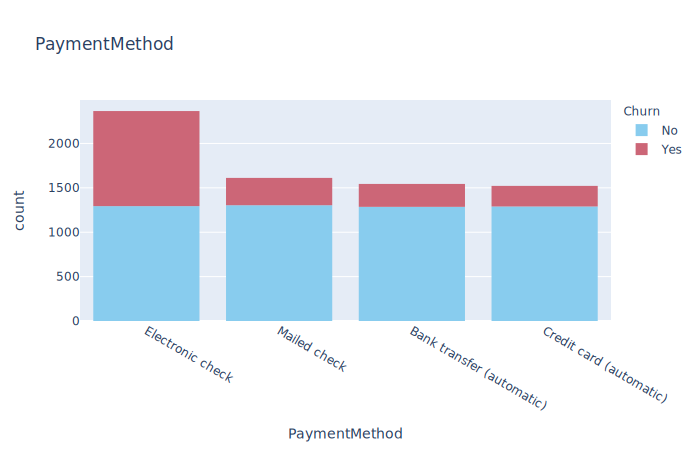

In [90]:
payment_method_chart=px.histogram(all_data, x='PaymentMethod', color='Churn', title='PaymentMethod',
                         color_discrete_sequence=px.colors.qualitative.Safe)

payment_method_chart.show('svg')

#### Problem: 

- 45,29% of customers that pay with electronic checks cancelled their contracts.


#### Interpretation: 

- Customers must be encouraged to pay with automatic methods, like bank transfer (automatic debit) and credit card. This is due to the fact that automatic payments do not periodically remind customers that they are paying for the service. On the other hand, the clients receive electronic checks monthly, which reminds them that their money is being spent. In addition, we should check if any problems are occurring with regard to the electronic check method. Maybe some clients are having issues while trying to pay with a check, so we need to clarify this doubt with the Finance department.


#### Solution: 

- Offer a 5% discount or 1 month free for customers that decide to pay with automatic methods. Also, schedule a meeting with the manager of the Finance department, in order to identify if any problems occurred with respect to the electronic check method.

### Additional information:

In this section, I will discuss about other insights that are not as relevant as the previous ones. As I said, each company has limited resources, so we should focus on the issues that were approached above. Nevertheless, it is important to register other problems that could be tackled in the future, when the most important ones may have been solved already.

### 6) Family size:

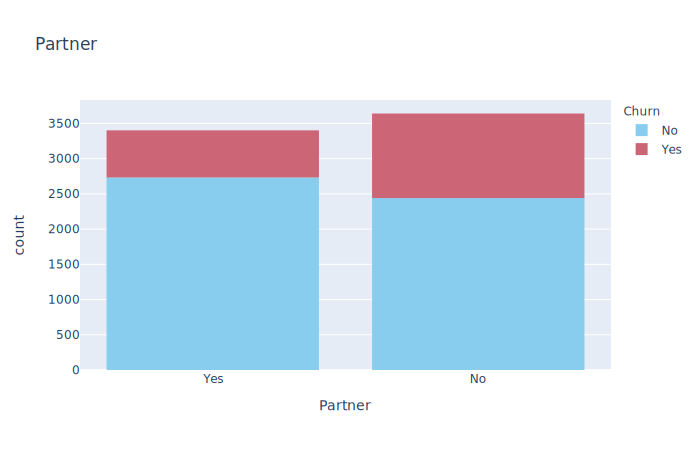

In [91]:
single_married_chart=px.histogram(all_data, x='Partner', color='Churn', title='Partner',
                         color_discrete_sequence=px.colors.qualitative.Safe)

single_married_chart.show('svg')

Clients that have a partner tend to cancel less. To be more specific, 19,67% of customers that have a partner cancelled their contracts, in comparison to 32,96% of clients that do not have a partner.

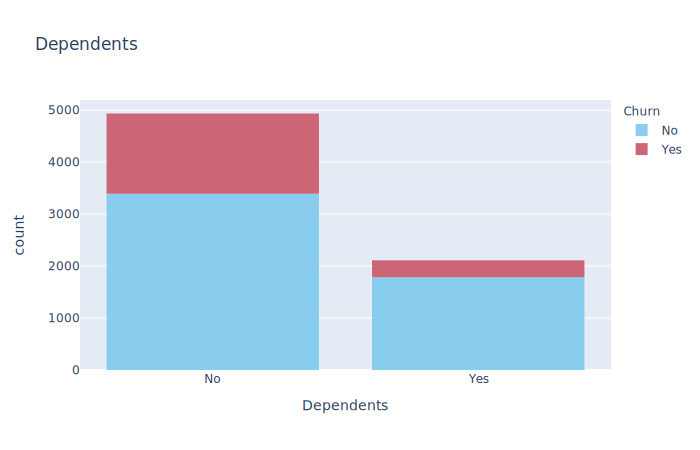

In [92]:
dependents_chart=px.histogram(all_data, x='Dependents', color='Churn', title='Dependents',
                         color_discrete_sequence=px.colors.qualitative.Safe)


dependents_chart.show('svg')

Clients that have dependents tend to cancel less. Taking this into consideration, it is important to state that 15,45% of customers that have dependents cancelled their contrats, while 31,28% of the clients that do not have dependents cancelled.

#### Problem: 

- Smaller families tend to cancel more than larger families.


#### Interpretation: 

- People that are single or do not have dependents (smaller families) are more willing to cancel. This probably happens because when you are single, you have more liberty to cancel a contract like this. However, when several members of your family use the firm's services, it is much harder to do it. This is due to the fact that they have advantages if all of them are clients of the same company, for example, free calls to cellphones of the same provider. 


#### Solution: 

- With respect to smaller families or single people, the company could offer discounts for customers that are only going to have on phone line, one internet router and 1 or 2 streaming tv users. Also, the firm could expand the benefits that target larger families, which could reduce even more the firm's churn rate in this segment.

### 6) Senior citizens:

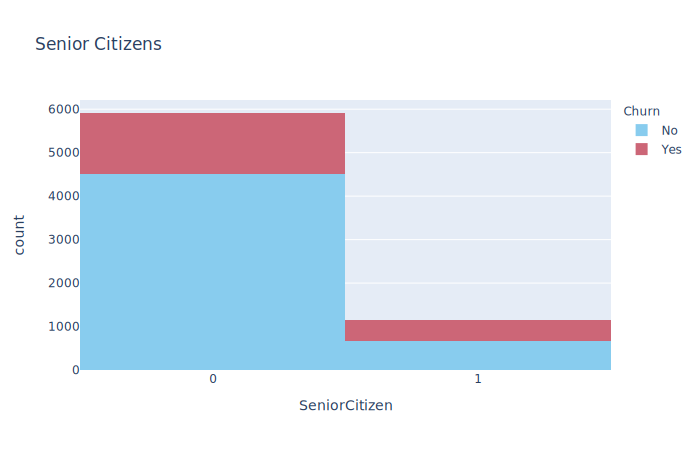

In [94]:
senior_chart=px.histogram(all_data, x='SeniorCitizen', color='Churn', title='Senior Citizens',
                         color_discrete_sequence=px.colors.qualitative.Safe)


senior_chart.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1])
)


senior_chart.show('svg')

Please, notice that the number '1' refers to senior citizens and '0' to non-senior citizens.

#### Problem: 

- 41,68% of senior citizens cancelled their contracts.


#### Interpretation: 

- Maybe a competitor is offering better deals to seniors. For instance, older people tend to struggle with technical problems. So, one possibility is that our technical support is not offering the value that seniors expect in this matter.


#### Solution: 

- Offer free technical suppport and device protection services for senior citizens.

Let's analyze how many seniors already have technical support and device protection services:

In [60]:
all_data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [61]:
senior_tech_support=all_data[['SeniorCitizen', 'TechSupport']]

display(senior_tech_support)

SeniorCitizen TechSupport
0                 0          No
1                 0          No
2                 0          No
3                 0         Yes
4                 0          No
...             ...         ...
7038              0         Yes
7039              0          No
7040              0          No
7041              1          No
7042              0         Yes

[7043 rows x 2 columns]

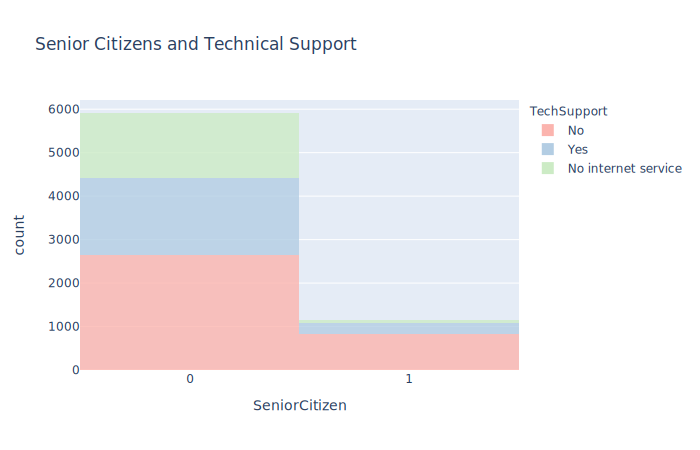

In [95]:
senior_tech=px.histogram(senior_tech_support, x='SeniorCitizen', color='TechSupport',
                         title='Senior Citizens and Technical Support',
                                color_discrete_sequence=px.colors.qualitative.Pastel1, opacity=0.8)

senior_tech.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1]))


senior_tech.show('svg')

After analyzing this graph, we identified that 72,68% of senior citizens don't have a technical support service. Therefore, it would be interesting to offer this service to them, in order to reduce their churn rate.

In [63]:
senior_deviceprotection=all_data[['SeniorCitizen', 'DeviceProtection']]

display(senior_deviceprotection)

SeniorCitizen DeviceProtection
0                 0               No
1                 0              Yes
2                 0               No
3                 0              Yes
4                 0               No
...             ...              ...
7038              0              Yes
7039              0              Yes
7040              0               No
7041              1               No
7042              0              Yes

[7043 rows x 2 columns]

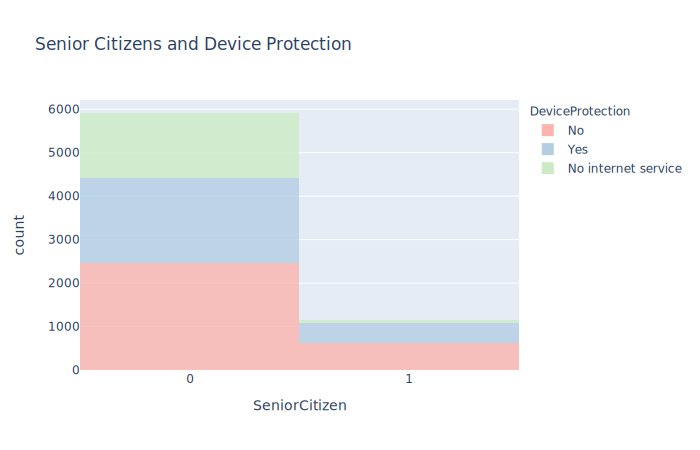

In [96]:
senior_device_chart=px.histogram(senior_deviceprotection, x='SeniorCitizen', color='DeviceProtection',
                                title='Senior Citizens and Device Protection',
                                color_discrete_sequence=px.colors.qualitative.Pastel1, opacity=0.8)

senior_device_chart.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1]))


senior_device_chart.show('svg')

54,64% of senior citizens do not have a device protection service included in their contracts. We should also consider to add this service in a special offer for this type of public.

### 7) Paperless Billing:

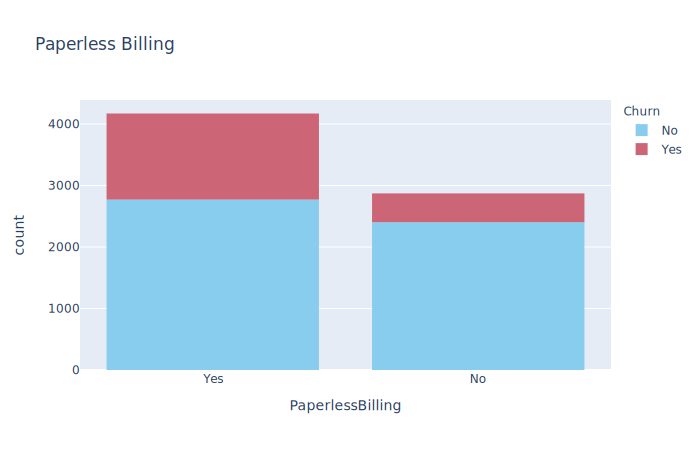

In [97]:
paperless_billing_chart=px.histogram(all_data, x='PaperlessBilling', color='Churn', title='Paperless Billing',
                         color_discrete_sequence=px.colors.qualitative.Safe)

paperless_billing_chart.show('svg')

#### Problem: 

- Clients that receive bills through their emails tend to cancel more.


#### Interpretation: 

- 33,57% of the customers that receive electronic bills cancelled their contracts. This could be a sign that maybe some clients are not receiving their bills or that the company is not being transparent. For instance, some bills might be in the customer's spam folder in their email accounts. This could be generating problems for them.


#### Solution: 

- Tell customers to check if the bills are being stored in their spam folders in their email accounts. Schedule a meeting with the IT department to look for solutions.

### Thank you!

If you are interested in my work or if you have any feedback, please don't hesitate in contacting me.